<a href="https://colab.research.google.com/github/fidanismayilzada23/Data-Analytics-Google-Colab-Workbooks/blob/main/Global_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
import kagglehub

path = kagglehub.dataset_download("START-UMD/gtd")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'gtd' dataset.
Path to dataset files: /kaggle/input/gtd


In [15]:
import pandas as pd
import os

os.listdir(path)


['globalterrorismdb_0718dist.csv']

In [16]:
df = pd.read_csv(os.path.join(path, "globalterrorismdb_0718dist.csv"), encoding="latin1")

/tmp/ipython-input-3392847333.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, "globalterrorismdb_0718dist.csv"), encoding="latin1")


In [45]:
df.shape

(181691, 48)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   eventid               181691 non-null  int64  
 1   iyear                 181691 non-null  int64  
 2   imonth                181691 non-null  int64  
 3   iday                  181691 non-null  int64  
 4   extended              181691 non-null  int64  
 5   country               181691 non-null  int64  
 6   country_txt           181691 non-null  object 
 7   region                181691 non-null  int64  
 8   region_txt            181691 non-null  object 
 9   provstate             181691 non-null  object 
 10  city                  181691 non-null  object 
 11  latitude              177135 non-null  float64
 12  longitude             177134 non-null  float64
 13  specificity           181691 non-null  float64
 14  vicinity              181691 non-null  int64  
 15  

In [47]:
len(df)

181691

In [48]:
df.isnull().mean().sort_values(ascending=False)
threshold = 0.5
df = df.loc[:, df.isnull().mean() < threshold]
df = df.dropna(axis=1, how='all')

In [49]:
# Fill categorical
cat_fill = [
    'provstate','city','target1',
    'natlty1_txt','targsubtype1_txt',
    'weapsubtype1_txt'
]
df[cat_fill] = df[cat_fill].fillna('Unknown')

# Fill numeric
df['nkill'] = df['nkill'].fillna(0)
df['nwound'] = df['nwound'].fillna(0)
df['nperps'] = df['nperps'].fillna(0)
df['nperpcap'] = df['nperpcap'].fillna(0)

df = df.drop(columns=[
    'summary','corp1','weapdetail',
    'nkillus','nkillter','nwoundus','nwoundte',
    'scite1'
])


KeyError: "['summary', 'corp1', 'weapdetail', 'nkillus', 'nkillter', 'nwoundus', 'nwoundte', 'scite1'] not found in axis"

In [50]:
df.head(3)

eventid  iyear  imonth  iday  extended  country         country_txt  \
0  197000000001   1970       7     2         0       58  Dominican Republic   
1  197000000002   1970       0     0         0      130              Mexico   
2  197001000001   1970       1     0         0      160         Philippines   

   region                   region_txt provstate  ... nwound  property  \
0       2  Central America & Caribbean   Unknown  ...    0.0         0   
1       1                North America   Federal  ...    0.0         0   
2       5               Southeast Asia    Tarlac  ...    0.0         0   

   ishostkid  dbsource  INT_LOG  INT_IDEO  INT_MISC  INT_ANY  \
0        0.0      PGIS        0         0         0        0   
1        1.0      PGIS        0         1         1        1   
2        0.0      PGIS       -9        -9         1        1   

   region_year_count  country_attack_count  
0                  7                    90  
1                472                   524  
2                 10                  6908  

[3 rows x 48 columns]

In [23]:
df['specificity'] = df['specificity'].fillna(df['specificity'].mode()[0])
df['doubtterr'] = df['doubtterr'].fillna(0)
df['multiple'] = df['multiple'].fillna(0)
df = df.drop(columns=['targsubtype1'])
df = df.drop(columns=['natlty1'])
df['guncertain1'] = df['guncertain1'].fillna(0)
df = df.drop(columns=['claimed'])
df = df.drop(columns=['weapsubtype1'])
df['ishostkid'] = df['ishostkid'].fillna(0)


In [51]:
df.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
extended                   0
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                  0
city                       0
latitude                4556
longitude               4557
specificity                0
vicinity                   0
crit1                      0
crit2                      0
crit3                      0
doubtterr                  0
multiple                   0
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
targtype1                  0
targtype1_txt              0
targsubtype1_txt           0
target1                    0
natlty1_txt                0
gname                      0
guncertain1                0
individual                 0
nperps                     0
nperpcap                   0
weaptype1                  0
weaptype1_txt              0
weapsubtype1_txt           0
nkill                      0
nwound                     0
property                   0
ishostkid                  0
dbsource                   0
INT_LOG                    0
INT_IDEO                   0
INT_MISC                   0
INT_ANY                    0
region_year_count          0
country_attack_count       0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 46 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181691 non-null  object 
 10  city              181691 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181691 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  crit1             181691 non-null  int64  
 16  crit2             18

In [52]:
df.corr(numeric_only=True)

eventid     iyear    imonth      iday  extended  \
eventid               1.000000  0.999996  0.002706  0.018336  0.091761   
iyear                 0.999996  1.000000  0.000139  0.018254  0.091754   
imonth                0.002706  0.000139  1.000000  0.005497 -0.000468   
iday                  0.018336  0.018254  0.005497  1.000000 -0.004700   
extended              0.091761  0.091754 -0.000468 -0.004700  1.000000   
country              -0.135039 -0.135023 -0.006305  0.003468 -0.020466   
region                0.401371  0.401384 -0.002999  0.009710  0.038389   
latitude              0.166886  0.166933 -0.015978  0.003423 -0.024749   
longitude             0.003907  0.003917 -0.003880 -0.002285  0.000523   
specificity           0.030634  0.030619  0.003621 -0.007002  0.057870   
vicinity              0.070646  0.070659 -0.004501 -0.005367  0.017784   
crit1                 0.002019  0.001995  0.001568  0.011434 -0.015029   
crit2                 0.026215  0.026211  0.001734 -0.002702  0.001249   
crit3                -0.016789 -0.016784  0.000176 -0.004889  0.048533   
doubtterr             0.298888  0.298921 -0.012478  0.002395  0.011637   
multiple              0.093718  0.093734 -0.004420 -0.000394 -0.013440   
success              -0.082972 -0.082963 -0.002845 -0.011802  0.073233   
suicide               0.137743  0.137736  0.003071  0.003593 -0.033961   
attacktype1           0.074173  0.074153  0.006705 -0.005333  0.272272   
targtype1             0.079080  0.079082 -0.000948 -0.000052  0.011613   
guncertain1           0.040570  0.040579 -0.004422 -0.002137  0.033536   
individual            0.017939  0.017944 -0.001661 -0.003788 -0.008929   
nperps               -0.209487 -0.209509  0.008665 -0.014297 -0.019961   
nperpcap              0.083158  0.083120  0.015034  0.001426  0.007356   
weaptype1            -0.011716 -0.011737  0.007863 -0.003019  0.207802   
nkill                 0.021263  0.021252  0.004031 -0.003225  0.014586   
nwound                0.017492  0.017484  0.003178 -0.001082 -0.010175   
property             -0.278927 -0.278916 -0.005816 -0.003903 -0.002096   
ishostkid            -0.009890 -0.009904  0.003397  0.004077  0.326368   
INT_LOG              -0.143600 -0.143601 -0.002302 -0.001540  0.071768   
INT_IDEO             -0.133252 -0.133253 -0.002034 -0.001621  0.075147   
INT_MISC             -0.077852 -0.077847 -0.002554 -0.002027  0.027335   
INT_ANY              -0.175605 -0.175596 -0.006336 -0.001199  0.080767   
region_year_count     0.625633  0.625658 -0.008915  0.019995  0.045163   
country_attack_count  0.403136  0.403129  0.003758  0.007988 -0.014217   

                       country    region  latitude  longitude  specificity  \
eventid              -0.135039  0.401371  0.166886   0.003907     0.030634   
iyear                -0.135023  0.401384  0.166933   0.003917     0.030619   
imonth               -0.006305 -0.002999 -0.015978  -0.003880     0.003621   
iday                  0.003468  0.009710  0.003423  -0.002285    -0.007002   
extended             -0.020466  0.038389 -0.024749   0.000523     0.057870   
country               1.000000  0.148597  0.178567  -0.000269    -0.084597   
region                0.148597  1.000000  0.309274   0.004351    -0.084194   
latitude              0.178567  0.309274  1.000000   0.001463    -0.018811   
longitude            -0.000269  0.004351  0.001463   1.000000     0.001065   
specificity          -0.084597 -0.084194 -0.018811   0.001065     1.000000   
vicinity             -0.012291  0.073678  0.005844   0.000594    -0.049858   
crit1                -0.006646  0.025521  0.021533  -0.000258     0.014321   
crit2                -0.038480 -0.013163 -0.004104  -0.000200     0.000972   
crit3                -0.040288 -0.010175 -0.001641  -0.000880    -0.072677   
doubtterr             0.038304  0.086831  0.068411   0.008296     0.041975   
multiple             -0.022220  0.011968 -0.024444   0.000950     0.036667   
success              -0.037827 -

In [53]:
#Countries with the most incidents
df["country_txt"].value_counts().head(10)


country_txt
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64

In [54]:
#Region × attack type
pd.crosstab(df["region_txt"], df["attacktype1_txt"])

attacktype1_txt              Armed Assault  Assassination  Bombing/Explosion  \
region_txt                                                                     
Australasia & Oceania                   51             36                 75   
Central America & Caribbean           4361           1254               3239   
Central Asia                           116            115                235   
East Asia                              117             55                330   
Eastern Europe                        1274            400               2766   
Middle East & North Africa            9273           4206              30908   
North America                          448            255               1534   
South America                         3875           2745               9039   
South Asia                           11404           4301              21246   
Southeast Asia                        4022           1369               4818   
Sub-Saharan Africa                    6004           1638               5557   
Western Europe                        1724           2938               8508   

attacktype1_txt              Facility/Infrastructure Attack  Hijacking  \
region_txt                                                               
Australasia & Oceania                                    71          3   
Central America & Caribbean                             403         26   
Central Asia                                             20          8   
East Asia                                               200         18   
Eastern Europe                                          260         26   
Middle East & North Africa                             1115        138   
North America                                           906         18   
South America                                           803         67   
South Asia                                             2189         93   
Southeast Asia                                          948         59   
Sub-Saharan Africa                                      810        136   
Western Europe                                         2631         67   

attacktype1_txt              Hostage Taking (Barricade Incident)  \
region_txt                                                         
Australasia & Oceania                                          6   
Central America & Caribbean                                  187   
Central Asia                                                   2   
East Asia                                                      3   
Eastern Europe                                                21   
Middle East & North Africa                                   100   
North America                                                 67   
South America                                                234   
South Asia                                                   120   
Southeast Asia                                                67   
Sub-Saharan Africa                                            95   
Western Europe                                                89   

attacktype1_txt              Hostage Taking (Kidnapping)  Unarmed Assault  \
region_txt                                                                  
Australasia & Oceania                                 13               11   
Central America & Caribbean                          501               19   
Central Asia                                          45                5   
East Asia                                             14               42   
Eastern Europe                                       220               62   
Middle East & North Africa                          2666              177   
North America                                        123               73   
South America                                       1414               47   
South Asia                                          3277              323   
Southeast Asia                            

In [55]:
#Yıllara göre terörden ölenlerin sayı
yearly = df.groupby('iyear').agg(
    attacks=('eventid','count'),
    killed=('nkill','sum'),
    wounded=('nwound','sum')
).reset_index()


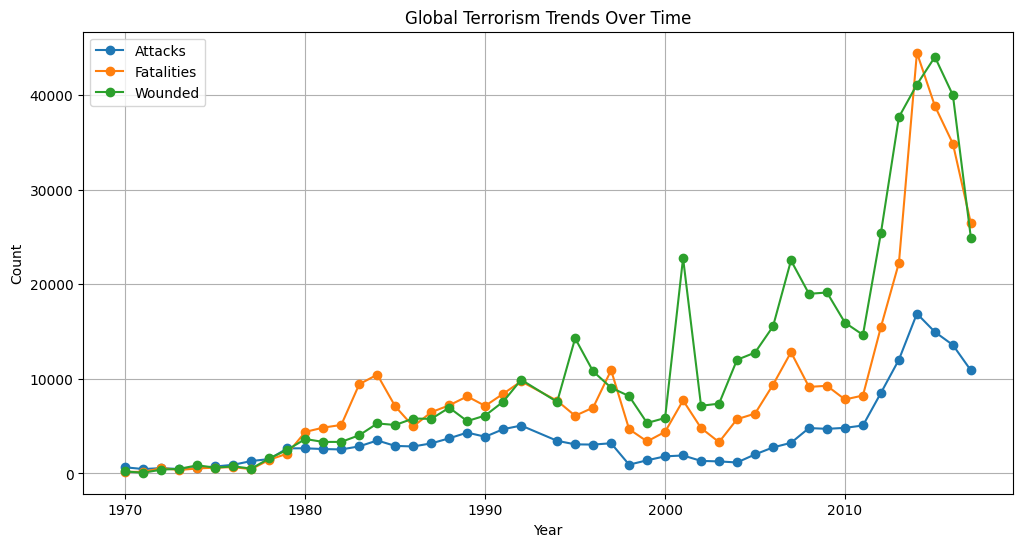

In [56]:
# Yıllık saldırılar
yearly_attacks = df.groupby('iyear')['eventid'].count()
# Yıllık ölümler
yearly_kill = df.groupby('iyear')['nkill'].sum()
# Yıllık yaralanmalar
yearly_wound = df.groupby('iyear')['nwound'].sum()

plt.figure(figsize=(12,6))
plt.plot(yearly_attacks.index, yearly_attacks.values, label='Attacks', marker='o')
plt.plot(yearly_kill.index, yearly_kill.values, label='Fatalities', marker='o')
plt.plot(yearly_wound.index, yearly_wound.values, label='Wounded', marker='o')
plt.title('Global Terrorism Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

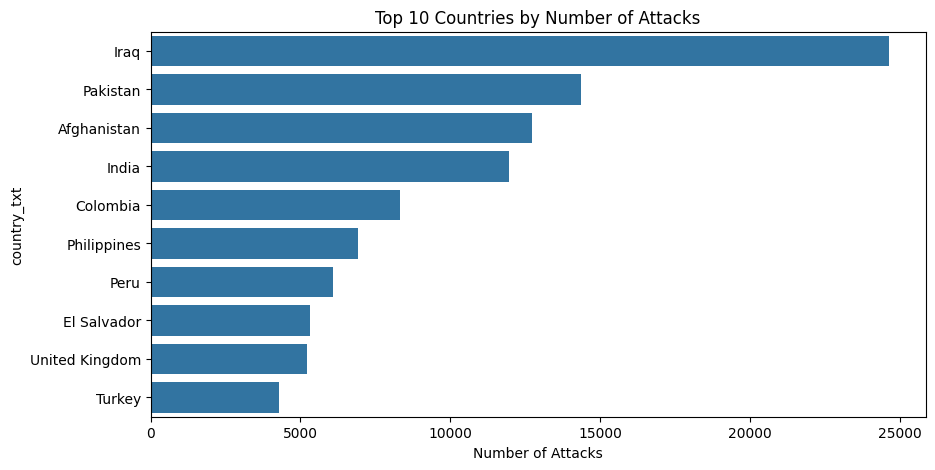

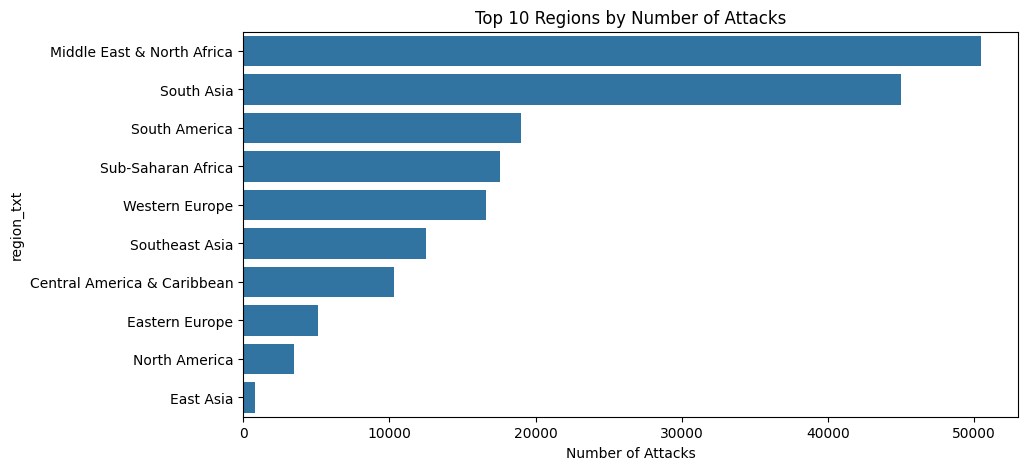

In [57]:
# Top 10 countries
top_countries = df['country_txt'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Number of Attacks')
plt.xlabel('Number of Attacks')
plt.show()

# Top 10 regions
top_regions = df['region_txt'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_regions.values, y=top_regions.index)
plt.title('Top 10 Regions by Number of Attacks')
plt.xlabel('Number of Attacks')
plt.show()


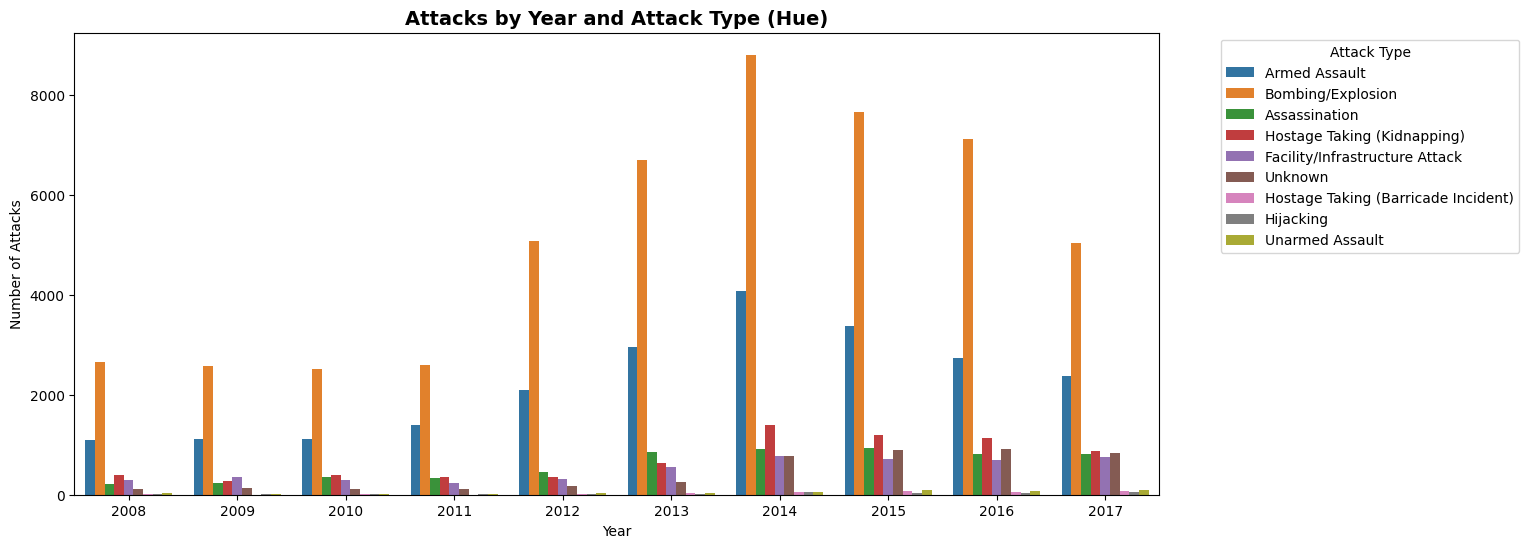

In [58]:
recent_df = df[df['iyear'] >= 2008]

plt.figure(figsize=(14,6))
sns.countplot(
    data=recent_df,
    x='iyear',
    hue='attacktype1_txt'
)
plt.title('Attacks by Year and Attack Type (Hue)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

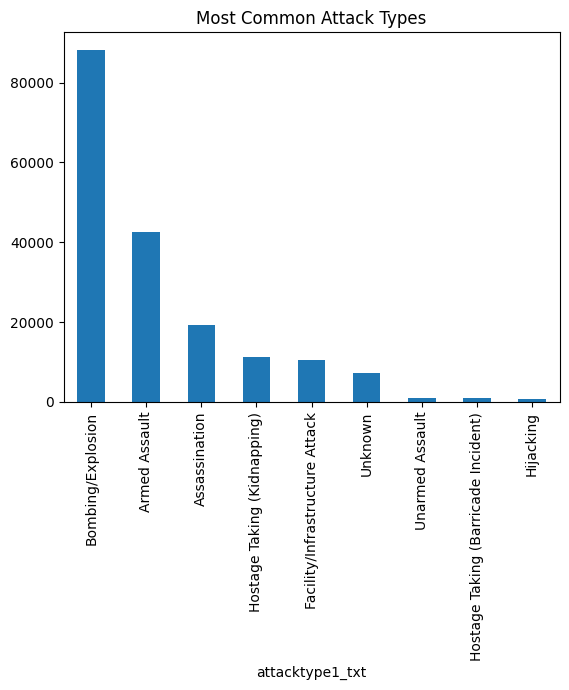

In [59]:
#saldırı tipi
df['attacktype1_txt'].value_counts().head(10).plot(kind='bar')
plt.title('Most Common Attack Types')
plt.show()

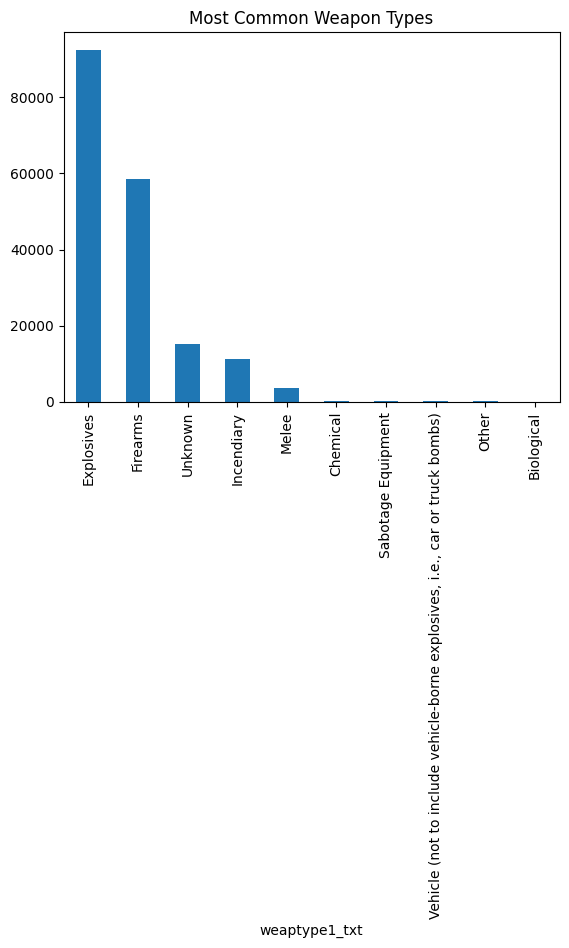

In [60]:
#silahla saldırı tipi
df['weaptype1_txt'].value_counts().head(10).plot(kind='bar')
plt.title('Most Common Weapon Types')
plt.show()

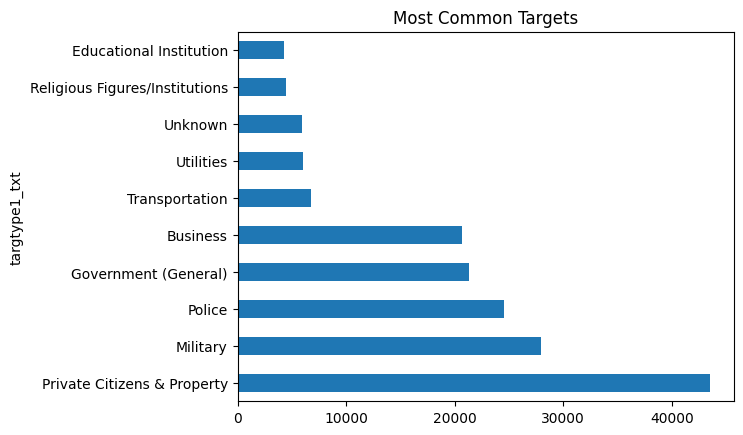

In [61]:
#En fazla nereye saldırı oluyor.
df['targtype1_txt'].value_counts().head(10).plot(kind='barh')
plt.title('Most Common Targets')
plt.show()

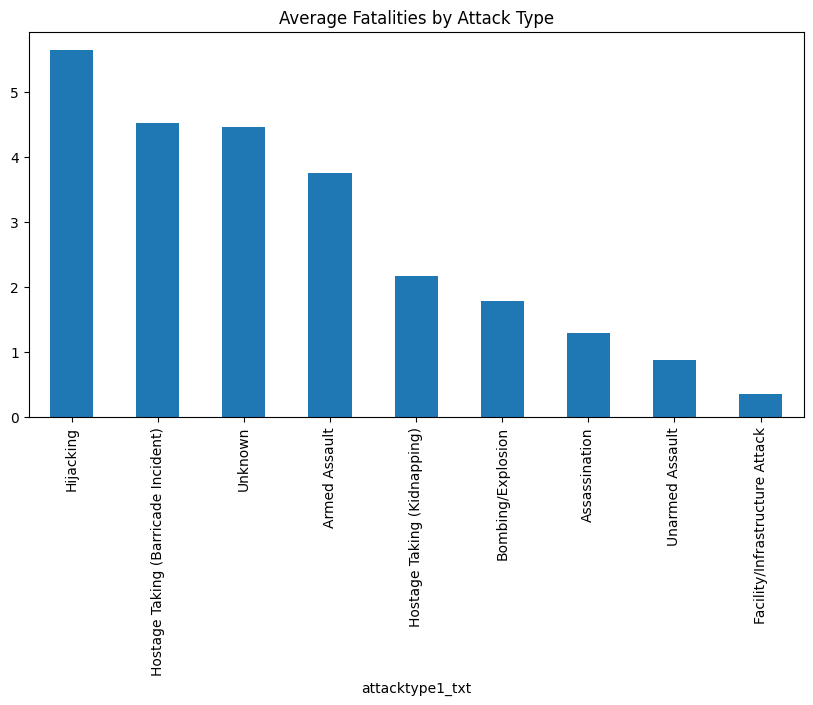

In [62]:
#saldırı tipinin etki şiddeti
lethality = df.groupby('attacktype1_txt')['nkill'].mean().sort_values(ascending=False).head(10)

lethality.plot(kind='bar', figsize=(10,5))
plt.title('Average Fatalities by Attack Type')
plt.show()


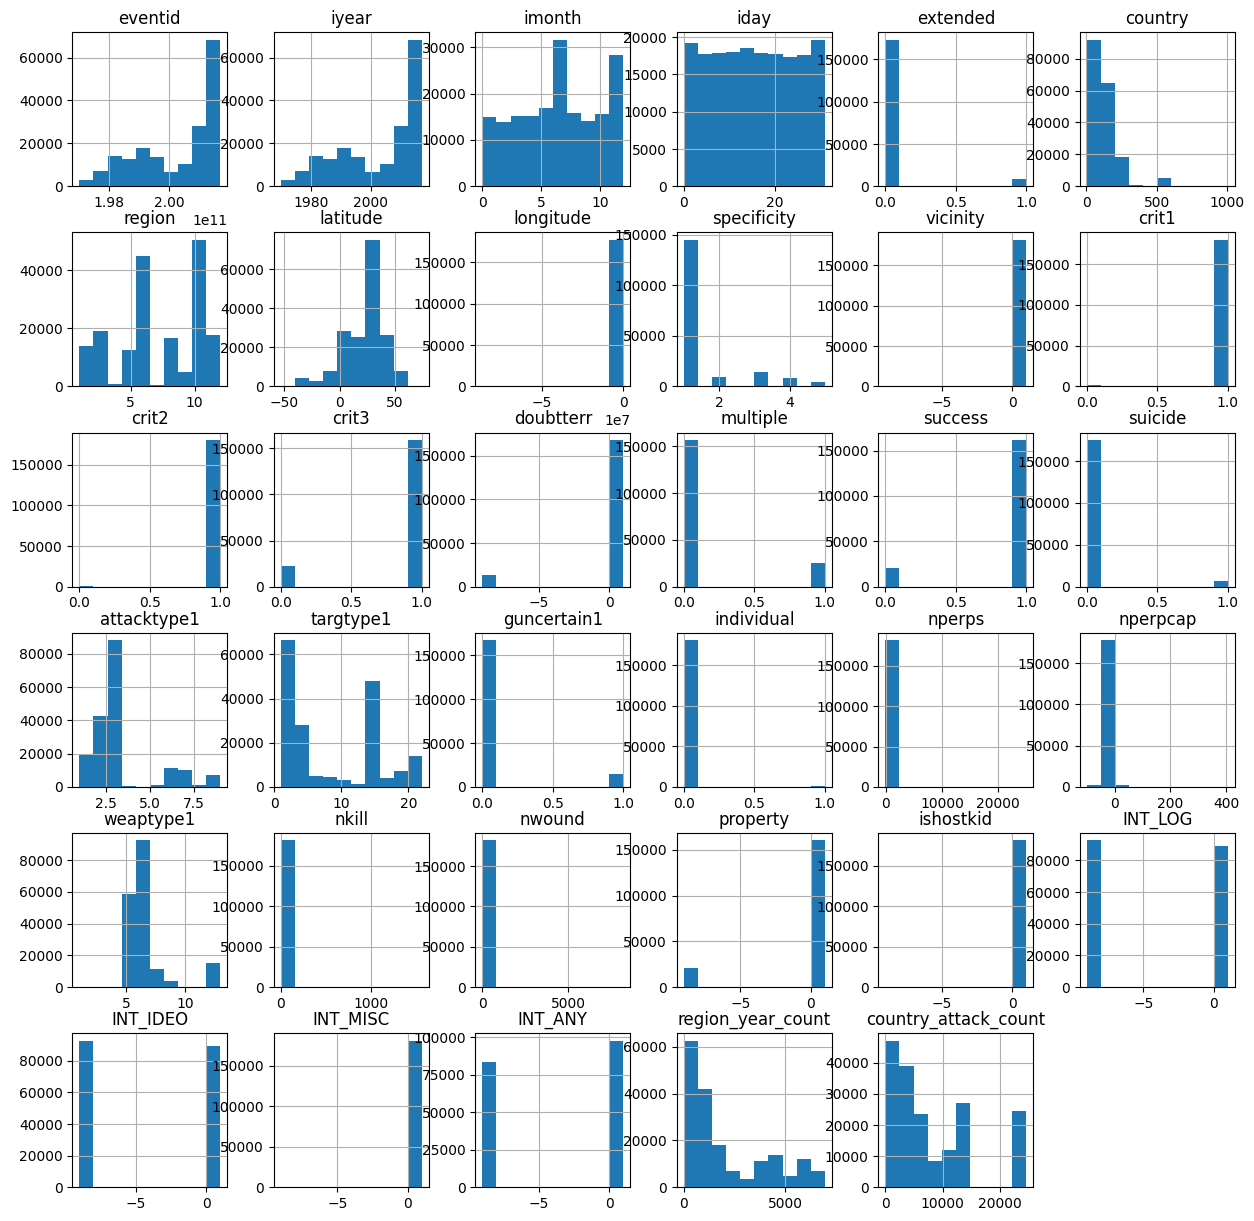

In [63]:
#bütün genel datanın görünüşü
df.hist(figsize=(15,15));

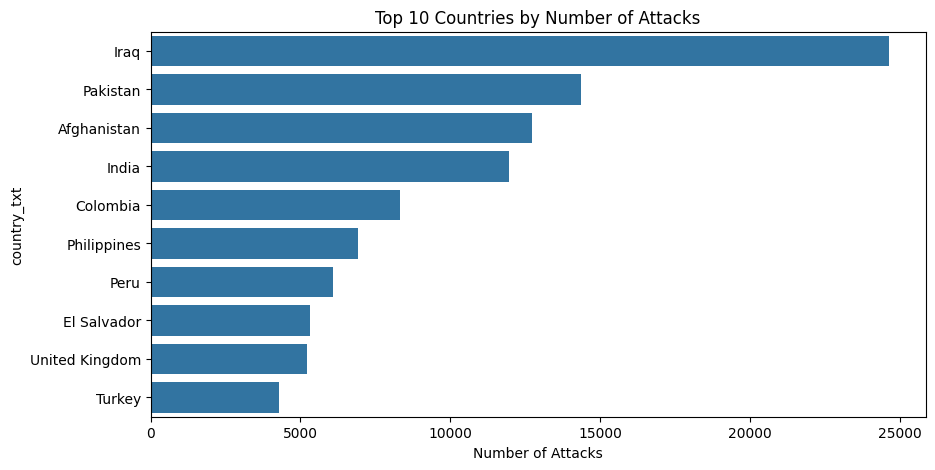

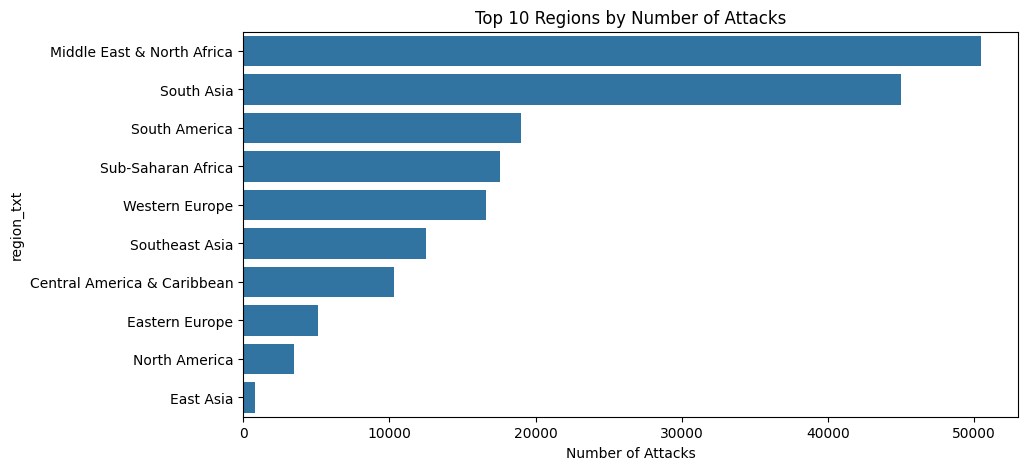

In [38]:
# Top 10 ölke
top_countries = df['country_txt'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Number of Attacks')
plt.xlabel('Number of Attacks')
plt.show()

# top 10 rayon
top_regions = df['region_txt'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_regions.values, y=top_regions.index)
plt.title('Top 10 Regions by Number of Attacks')
plt.xlabel('Number of Attacks')
plt.show()


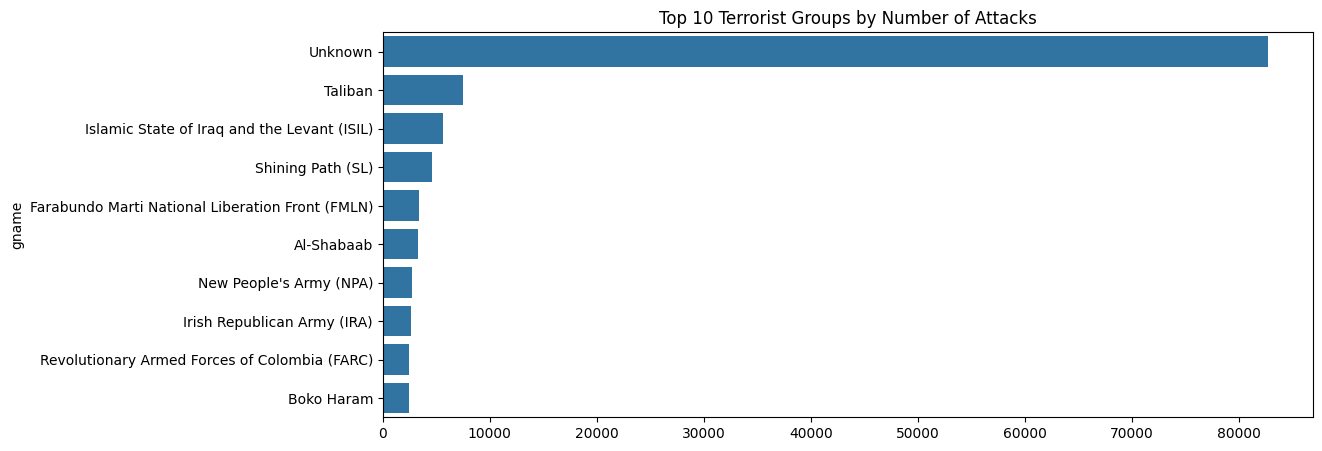

In [64]:
top_groups = df['gname'].value_counts().head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=top_groups.values, y=top_groups.index)
plt.title('Top 10 Terrorist Groups by Number of Attacks')
plt.show()


In [40]:
df['gname'].value_counts().head(10)

gname
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: count, dtype: int64

In [41]:
df['region_year_count'] = df.groupby(['region_txt', 'iyear'])['eventid'].transform('count')
df

eventid  iyear  imonth  iday  extended  country  \
0       197000000001   1970       7     2         0       58   
1       197000000002   1970       0     0         0      130   
2       197001000001   1970       1     0         0      160   
3       197001000002   1970       1     0         0       78   
4       197001000003   1970       1     0         0      101   
...              ...    ...     ...   ...       ...      ...   
181686  201712310022   2017      12    31         0      182   
181687  201712310029   2017      12    31         0      200   
181688  201712310030   2017      12    31         0      160   
181689  201712310031   2017      12    31         0       92   
181690  201712310032   2017      12    31         0      160   

               country_txt  region                   region_txt  \
0       Dominican Republic       2  Central America & Caribbean   
1                   Mexico       1                North America   
2              Philippines       5               Southeast Asia   
3                   Greece       8               Western Europe   
4                    Japan       4                    East Asia   
...                    ...     ...                          ...   
181686             Somalia      11           Sub-Saharan Africa   
181687               Syria      10   Middle East & North Africa   
181688         Philippines       5               Southeast Asia   
181689               India       6                   South Asia   
181690         Philippines       5               Southeast Asia   

              provstate  ... nkill  nwound  property  ishostkid  \
0               Unknown  ...   1.0     0.0         0        0.0   
1               Federal  ...   0.0     0.0         0        1.0   
2                Tarlac  ...   1.0     0.0         0        0.0   
3                Attica  ...   0.0     0.0         1        0.0   
4               Fukouka  ...   0.0     0.0         1        0.0   
...                 ...  ...   ...     ...       ...        ...   
181686  Middle Shebelle  ...   1.0     2.0        -9        0.0   
181687         Lattakia  ...   2.0     7.0         1        0.0   
181688      Maguindanao  ...   0.0     0.0         1        0.0   
181689          Manipur  ...   0.0     0.0        -9        0.0   
181690      Maguindanao  ...   0.0     0.0         0        0.0   

                        dbsource  INT_LOG  INT_IDEO  INT_MISC  INT_ANY  \
0                           PGIS        0         0         0        0   
1                           PGIS        0         1         1        1   
2                           PGIS       -9        -9         1        1   
3                           PGIS       -9        -9         1        1   
4                           PGIS       -9        -9         1        1   
...                          ...      ...       ...       ...      ...   
181686  START Primary Collection        0         0         0        0   
181687  START Primary Collection       -9        -9         1        1   
181688  START Primary Collection        0         0         0        0   
181689  START Primary Collection       -9        -9         0       -9   
181690  START Primary Collection       -9        -9         0       -9   

        region_year_count  
0                       7  
1                     472  
2                      10  
3                      50  
4                       2  
...                   ...  
181686               1970  
181687               3780  
181688               1020  
181689               3430  
181690               1020  

[181691 rows x 47 columns]

In [65]:
country_counts = df['country_txt'].value_counts()
df['country_attack_count'] = df['country_txt'].map(country_counts)
df


eventid  iyear  imonth  iday  extended  country  \
0       197000000001   1970       7     2         0       58   
1       197000000002   1970       0     0         0      130   
2       197001000001   1970       1     0         0      160   
3       197001000002   1970       1     0         0       78   
4       197001000003   1970       1     0         0      101   
...              ...    ...     ...   ...       ...      ...   
181686  201712310022   2017      12    31         0      182   
181687  201712310029   2017      12    31         0      200   
181688  201712310030   2017      12    31         0      160   
181689  201712310031   2017      12    31         0       92   
181690  201712310032   2017      12    31         0      160   

               country_txt  region                   region_txt  \
0       Dominican Republic       2  Central America & Caribbean   
1                   Mexico       1                North America   
2              Philippines       5               Southeast Asia   
3                   Greece       8               Western Europe   
4                    Japan       4                    East Asia   
...                    ...     ...                          ...   
181686             Somalia      11           Sub-Saharan Africa   
181687               Syria      10   Middle East & North Africa   
181688         Philippines       5               Southeast Asia   
181689               India       6                   South Asia   
181690         Philippines       5               Southeast Asia   

              provstate  ... nwound  property  ishostkid  \
0               Unknown  ...    0.0         0        0.0   
1               Federal  ...    0.0         0        1.0   
2                Tarlac  ...    0.0         0        0.0   
3                Attica  ...    0.0         1        0.0   
4               Fukouka  ...    0.0         1        0.0   
...                 ...  ...    ...       ...        ...   
181686  Middle Shebelle  ...    2.0        -9        0.0   
181687         Lattakia  ...    7.0         1        0.0   
181688      Maguindanao  ...    0.0         1        0.0   
181689          Manipur  ...    0.0        -9        0.0   
181690      Maguindanao  ...    0.0         0        0.0   

                        dbsource  INT_LOG  INT_IDEO  INT_MISC  INT_ANY  \
0                           PGIS        0         0         0        0   
1                           PGIS        0         1         1        1   
2                           PGIS       -9        -9         1        1   
3                           PGIS       -9        -9         1        1   
4                           PGIS       -9        -9         1        1   
...                          ...      ...       ...       ...      ...   
181686  START Primary Collection        0         0         0        0   
181687  START Primary Collection       -9        -9         1        1   
181688  START Primary Collection        0         0         0        0   
181689  START Primary Collection       -9        -9         0       -9   
181690  START Primary Collection       -9        -9         0       -9   

        region_year_count  country_attack_count  
0                       7                    90  
1                     472                   524  
2                      10                  6908  
3                      50                  1275  
4                       2                   402  
...                   ...                   ...  
181686               1970                  4142  
181687               3780                  2201  
181688               1020                  6908  
181689               3430                 11960  
181690               1020                  6908  

[181691 rows x 48 columns]

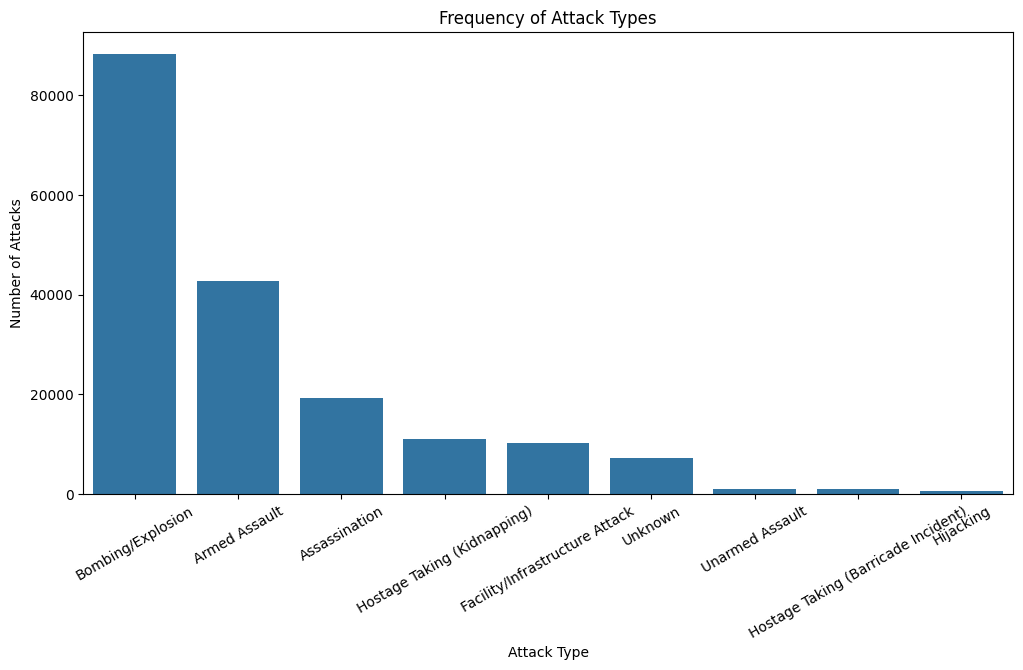

In [66]:
attack_counts = df['attacktype1_txt'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=attack_counts.index, y=attack_counts.values)
plt.title('Frequency of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=30)
plt.show()


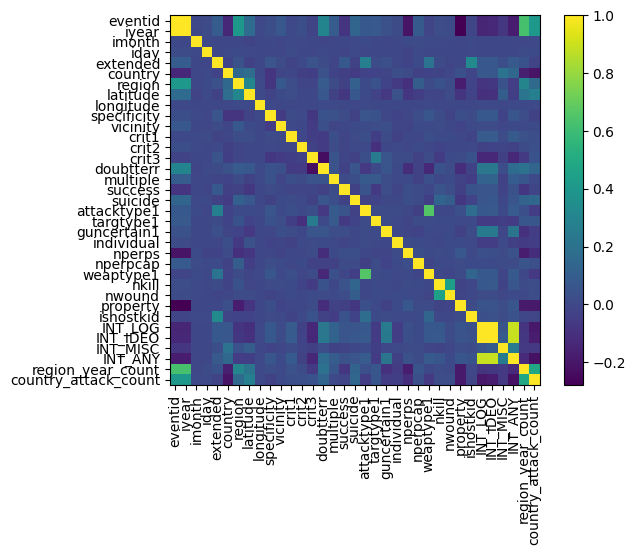

In [73]:
corr = df.corr(numeric_only=True)
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns,rotation=90)
plt.yticks(range(len(corr)),corr.columns);


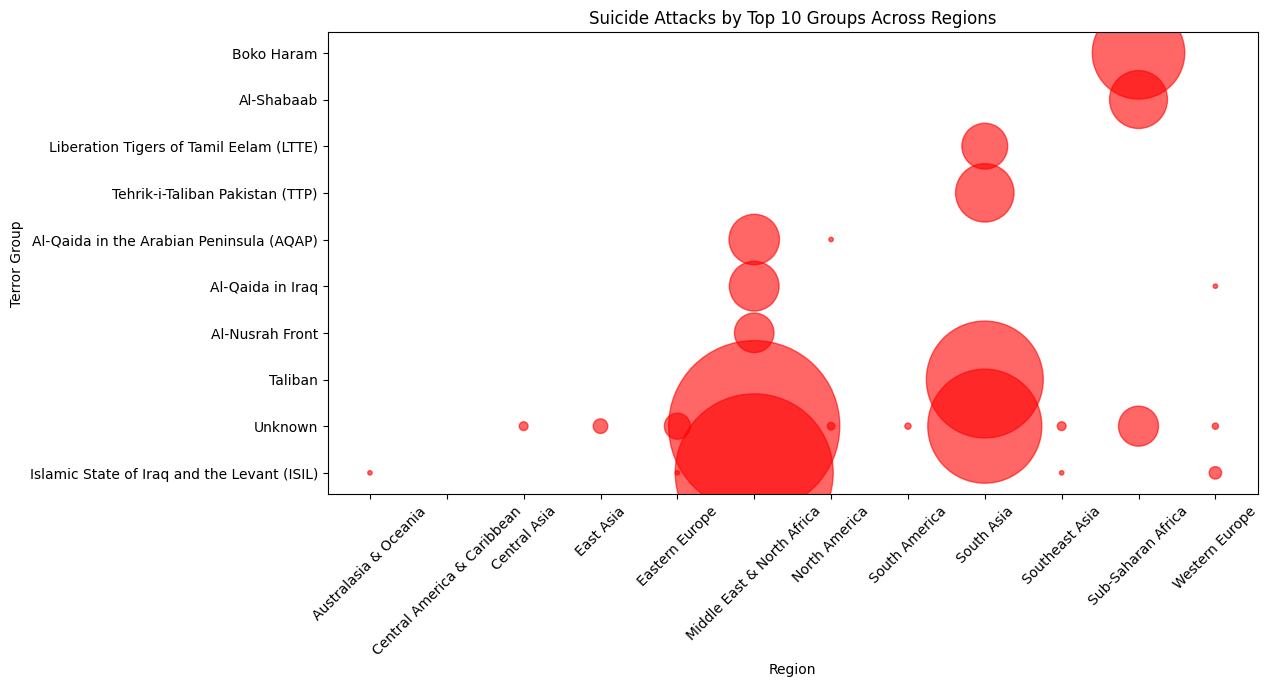

In [68]:
group_region = df.groupby(['region_txt','gname'])['suicide'].sum().reset_index()
top_groups = group_region.groupby('gname')['suicide'].sum().sort_values(ascending=False).head(10).index
plot_data = group_region[group_region['gname'].isin(top_groups)]

plt.figure(figsize=(12,6))
plt.scatter(
    x=plot_data['region_txt'],
    y=plot_data['gname'],
    s=plot_data['suicide']*10,
    alpha=0.6,
    color='red')
plt.xticks(rotation=45)
plt.title("Suicide Attacks by Top 10 Groups Across Regions")
plt.xlabel("Region")
plt.ylabel("Terror Group")
plt.show()


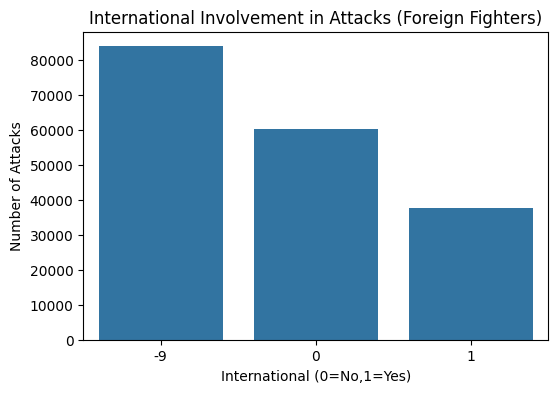

In [69]:
# INT_ANY = international involvement (foreign fighters)
plt.figure(figsize=(6,4))
sns.countplot(x='INT_ANY', data=df)
plt.title('International Involvement in Attacks (Foreign Fighters)')
plt.xlabel('International (0=No,1=Yes)')
plt.ylabel('Number of Attacks')
plt.show()


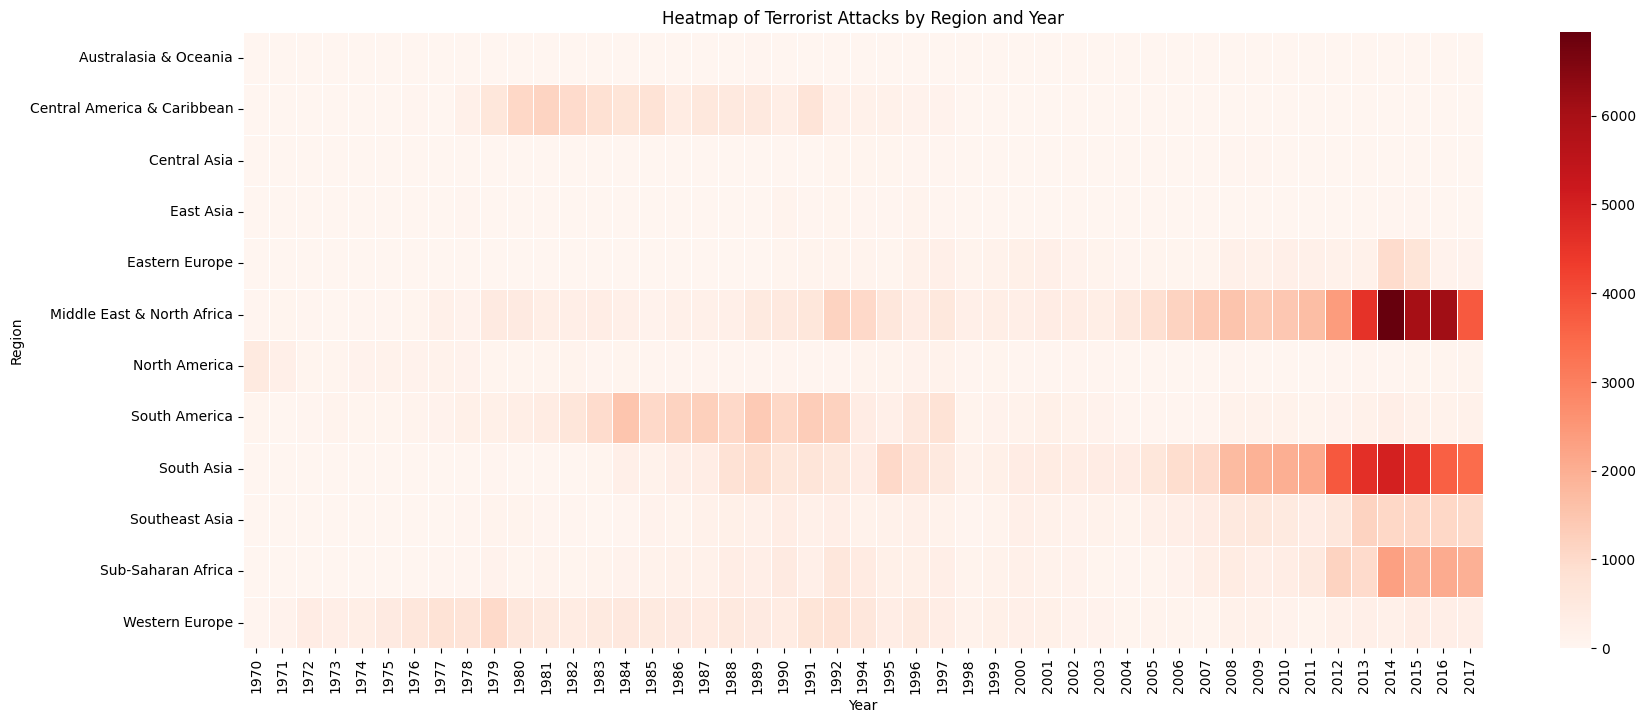

In [70]:
pivot_region_year = df.pivot_table(index='region_txt', columns='iyear', values='eventid', aggfunc='count', fill_value=0)
plt.figure(figsize=(20,8))
sns.heatmap(pivot_region_year, cmap='Reds', linewidths=0.5)
plt.title('Heatmap of Terrorist Attacks by Region and Year')
plt.xlabel('Year')
plt.ylabel('Region')
plt.show()

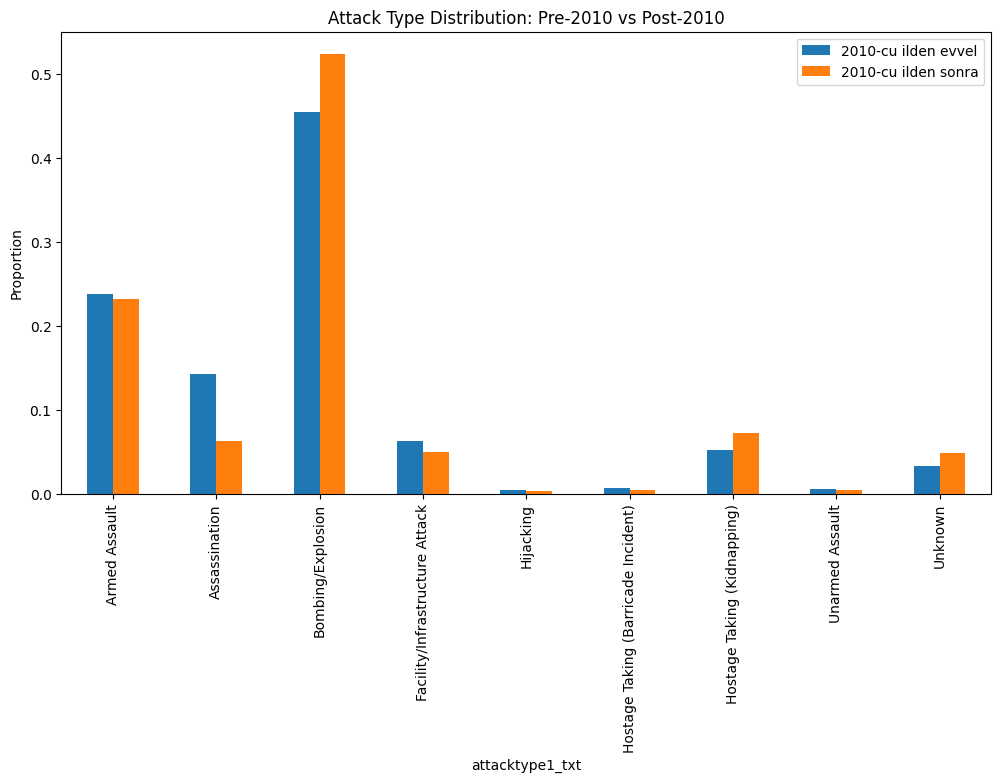

In [71]:
evvel = df[df['iyear'] <= 2010]
sonra = df[df['iyear'] > 2010]

pre_attacks = evvel['attacktype1_txt'].value_counts(normalize=True)
post_attacks = sonra['attacktype1_txt'].value_counts(normalize=True)

df_compare = pd.DataFrame({'2010-cu ilden evvel': pre_attacks, '2010-cu ilden sonra': post_attacks}).fillna(0)
df_compare.plot(kind='bar', figsize=(12,6))
plt.title('Attack Type Distribution: Pre-2010 vs Post-2010')
plt.ylabel('Proportion')
plt.show()


In [74]:
import folium
from folium.plugins import HeatMap

geo_df = df.dropna(subset=['latitude','longitude'])
map = folium.Map(location=[20,0], zoom_start=2)
heat_data = list(zip(geo_df['latitude'], geo_df['longitude']))
HeatMap(heat_data, radius=8, blur=4).add_to(map)
map
